In [11]:
import numpy as np
import random as rd
import sys
sys.path.insert(0, '../src/model/')
sys.path.insert(1, '../src/view/')
from Taixxa import Taixxa
from FitnessViewer import FitnessViewer

<Figure size 640x480 with 1 Axes>

In [190]:


                        
                    data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAY0AAAD8CAYAAACLrvgBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAF8dJREFUeJzt3X2QXfV93/H3d3f1ZAxIgKBEki0R5Ac5rQFvZSU0cRAMCNdTMS2eEdMxqovLlELjh0xsSNoy2E4HOx6T4jFkmEAiXBKhABM0DERVMNRtbQtWPAuhsDwYKcIg0APYGImVvv3j/la6yKvds9q7vtpz36+ZO/ec7/mds+ccXemjc36/ezYyE0mSquhq9w5IkiYOQ0OSVJmhIUmqzNCQJFVmaEiSKjM0JEmVGRqSpMoMDUlSZYaGJKmynnbvQKudcMIJOXfu3HbvhiRNKOvXr38tM2eO1K52oTF37lz6+vravRuSNKFExE+qtPP2lCSpMkNDklSZoSFJqszQkCRVNmJoRMTUiHgoIh6PiA0Rcc1By78TET9rmp8SEbdHRH9ErIuIuU3Lrir1TRFxXlN9San1R8SVTfV5ZRvPlm1OHusBS5IOX5Urjd3A4sz8KHAasCQiFgFERC8w/aD2lwA7MvNU4DrgG6XtAmAZ8BFgCXBDRHRHRDfwXeB8YAFwUWlLWfe6zJwP7CjbliS1yYihkQ2DVxKTyivLP/Z/Anz5oFWWAivK9B3A2RERpb4yM3dn5gtAP7CwvPoz8/nM3AOsBJaWdRaXbVC2ecFhHqckqQUq9WmUK4LHgFeBtZm5DrgCWJ2ZLx/UfBawGSAzB4BdwPHN9WJLqR2qfjyws2yjuT7U/l0aEX0R0bf5lderHJIk6TBUCo3M3JuZpwGzgYUR8TvAp4HvDNE8htpEC+tD7d9Nmdmbmb17e6YO1USS1AKjGj2VmTuBB4GzgFOB/oh4EXhPRPSXZluAOQAR0QMcC2xvrhezga3D1F8DppdtNNclSW1SZfTUzIiYXqanAecA6zPzn2Tm3MycC7xVOr4BVgPLy/SFwPczM0t9WRldNQ+YDzwEPAzMLyOlJtPoLF9d1nmgbIOyzbvHfsiSpMNV5dlTJwMrSsd3F7AqM+8Zpv3NwPfKlcd2GiFAZm6IiFXA08AAcHlm7gWIiCuANUA3cEtmbijb+gqwMiK+Djxatj28IW9gSZJaIRr/oa+PE+Z+OF97cWO7d0OSJpSIWJ+ZvSO18xvhkqTKDA1JUmWGhiSpMkNDklSZoSFJqqx2oVGvsWCSdGSpXWhIksaPoSFJqszQkCRVZmhIkiozNCRJlRkakqTKDA1JUmWGhiSpMkNDklSZoSFJqszQkCRVZmhIkiqrXWjU7LfXStIRpXahIUkaP4aGJKkyQ0OSVJmhIUmqzNCQJFVmaEiSKjM0JEmVGRqSpMoMDUlSZYaGJKmyGoaGzxGRpPFSw9CQJI2X2oWG1xmSNH5qFxqSpPFjaEiSKjM0JEmVGRqSpMoMDUlSZYaGJKmyEUMjIqZGxEMR8XhEbIiIa0r9tojYFBFPRcQtETGp1CMiro+I/oh4IiLOaNrW8oh4tryWN9U/FhFPlnWuj4go9eMiYm1pvzYiZrT+FEiSqqpypbEbWJyZHwVOA5ZExCLgNuBDwD8FpgGfK+3PB+aX16XAjdAIAOBq4OPAQuDqphC4sbQdXG9JqV8J3J+Z84H7y7wkqU1GDI1s+FmZnVRemZn3lmUJPATMLm2WAreWRT8GpkfEycB5wNrM3J6ZO4C1NALoZOCYzPxR2datwAVN21pRplc01YfZ3wpHLUk6LJX6NCKiOyIeA16l8Q//uqZlk4DPAH9XSrOAzU2rbym14epbhqgDnJSZLwOU9xOrHZYkaTxUCo3M3JuZp9G4mlgYEb/RtPgG4AeZ+X/KfAy1icOoVxYRl0ZEX0T0DQwMjGZVSdIojGr0VGbuBB6k9DlExNXATOBLTc22AHOa5mcDW0eozx6iDvBKuX1FeX/1EPt1U2b2ZmZvT0/PaA5JkjQKVUZPzYyI6WV6GnAO8ExEfI5GP8VFmbmvaZXVwMVlFNUiYFe5tbQGODciZpQO8HOBNWXZmxGxqIyauhi4u2lbg6OsljfVJUltUOW/5ScDKyKim0bIrMrMeyJiAPgJ8KMyQvauzPwqcC/wSaAfeAv4LEBmbo+IrwEPl+1+NTO3l+nLgL+kMQrrvvICuBZYFRGXAC8Bnx7DsUqSxiiyZsONpr/vQ7nzpWfavRuSNKFExPrM7B2pnd8IlyRVZmhIkiozNCRJlRkakqTKDA1JUmW1C416jQWTpCNL7UJDkjR+DA1JUmX1Cw3vT0nSuKlfaEiSxk3tQiO91JCkcVO70JAkjR9DQ5JUmaEhSaqsdqFhj4YkjZ/ahYapIUnjp36hIUkaN4aGJKmy2oWGd6ckafzULjQkSePH0JAkVWZoSJIqq19o2KkhSeOmdqHhAwslafzULjQkSePH0JAkVWZoSJIqq11o2KMhSeOndqEhSRo/hoYkqbKedu9Aq2XC6se3AnDS0VP4+CnHt3mPJKk+ahca+zL5vb9+FIAIePzqczlm6qQ275Uk1UPtbk994KSj+fsvfYLfW3wqmbBnYF+7d0mSaqN2oTGlp4tTT3wvM4+eAjRuV0mSWqN2obFfBOBjRSSplWobGjE4YWZIUsvUNzRKapgZktQ69Q2Ncq1hn4Yktc6IoRERUyPioYh4PCI2RMQ1pT4vItZFxLMRcXtETC71KWW+vyyf27Stq0p9U0Sc11RfUmr9EXFlU33In1HFgSsNU0OSWqXKlcZuYHFmfhQ4DVgSEYuAbwDXZeZ8YAdwSWl/CbAjM08FrivtiIgFwDLgI8AS4IaI6I6IbuC7wPnAAuCi0pZhfsaIBvs0vNKQpNYZMTSy4WdldlJ5JbAYuKPUVwAXlOmlZZ6y/OyIiFJfmZm7M/MFoB9YWF79mfl8Zu4BVgJLyzqH+hkjsk9DklqvUp9GuSJ4DHgVWAs8B+zMzIHSZAswq0zPAjYDlOW7gOOb6wetc6j68cP8jJH3eX+fhrEhSa1SKTQyc29mngbMpnFl8OGhmpX3OMSyVtV/SURcGhF9EdG3bdu2d+2FmSFJrTOq0VOZuRN4EFgETI+IwWdXzQa2luktwByAsvxYYHtz/aB1DlV/bZifcfB+3ZSZvZnZO3PmTGDoxJEkjU2V0VMzI2J6mZ4GnANsBB4ALizNlgN3l+nVZZ6y/PvZuEe0GlhWRlfNA+YDDwEPA/PLSKnJNDrLV5d1DvUzRhThkFtJarUqT7k9GVhRRjl1Aasy856IeBpYGRFfBx4Fbi7tbwa+FxH9NK4wlgFk5oaIWAU8DQwAl2fmXoCIuAJYA3QDt2TmhrKtrxziZ4xo/+gpu8IlqWVGDI3MfAI4fYj68zT6Nw6uvw18+hDb+mPgj4eo3wvcW/VnVBHen5KklqvvN8LtCJeklqtvaAwOuW3zfkhSndQ3NPZfaRgbktQqtQ2NQUaGJLVO/UPD1JCklqltaEQcGHQrSWqN+oZGefdKQ5Jap76h4VNuJanl6hsa/uY+SWq5+oaGv7lPklquvqFR3r3SkKTWqW9o+BgRSWq52oYG+x8jYmpIUqvUNjS80pCk1qtvaLR7BySphuobGv7mPklqufqGRnm3T0OSWqe+oWGfhiS1XP1Do727IUm1Ut/Q2P8YEWNDklqlvqFRrjQu+5+PtHdHJKlGahsaZ7x/Bl0BP33jbfbt82pDklqhtqFxzNRJfPGcDwCw11tUktQStQ0NgO7uxj2qvV5pSFJL1Ds0wtCQpFaqd2h0NUJjwNCQpJaodWj0dHmlIUmtVOvQ6DY0JKmlah4ajcMzNCSpNWoeGo33W3/0Iq++8XZb90WS6qDWofG+446ipyu44cHnWNW3ud27I0kTXq1D4zd//Xg2fm0JPV3Bz/fsbffuSNKEV+vQAJjU3cW0Sd28/Y6hIUljVfvQAJjc08Vf/L8XuX/jK+3eFUma0DoiNC44fRYAf7JmU5v3RJImto4Ijf/6qQV8dM70du+GJE14HREaAL927FT2+bRbSRqTjgmN7q7wGVSSNEYjhkZEzImIByJiY0RsiIjPl/ppEfHjiHgsIvoiYmGpR0RcHxH9EfFERJzRtK3lEfFseS1vqn8sIp4s61wf0Xg8bUQcFxFrS/u1ETHjcA+0uyv8ZrgkjVGVK40B4Pcz88PAIuDyiFgAfBO4JjNPA/5bmQc4H5hfXpcCN0IjAICrgY8DC4Grm0LgxtJ2cL0lpX4lcH9mzgfuL/OHpbsrGNhraEjSWIwYGpn5cmY+UqbfBDYCs4AEjinNjgW2lumlwK3Z8GNgekScDJwHrM3M7Zm5A1gLLCnLjsnMH2VmArcCFzRta0WZXtFUH7WerrBPQ5LGqGc0jSNiLnA6sA74ArAmIr5FI3x+qzSbBTQ/s2NLqQ1X3zJEHeCkzHwZGuEVESeOZn+bdXd12achSWNUuSM8It4L3Al8ITPfAC4DvpiZc4AvAjcPNh1i9TyMemURcWnpV+nbtm3bkG167NOQpDGrFBoRMYlGYNyWmXeV8nJgcPpvaPRTQONKYU7T6rNp3Loarj57iDrAK+X2FeX91aH2LzNvyszezOydOXPmkMfQ6NPYN8KRSpKGU2X0VNC4itiYmd9uWrQV+ESZXgw8W6ZXAxeXUVSLgF3lFtMa4NyImFE6wM8F1pRlb0bEovKzLgbubtrW4Cir5U31UfNKQ5LGrkqfxpnAZ4AnI+KxUvtD4D8A/yMieoC3aYx+ArgX+CTQD7wFfBYgM7dHxNeAh0u7r2bm9jJ9GfCXwDTgvvICuBZYFRGXAC8Bnz6MYwSgu7vxpNtv/69NfOncDx7uZiSpo0XWbERRb29v9vX1/VJ9/U928G9u/CHvO+49/ODLZ7VhzyTpyBUR6zOzd6R2HfON8I+9fwb/+oxZDruVpDHomNAA+zUkaaw6KjT8roYkjU2HhQbsMzQk6bB1VGj0eKUhSWPSUaHhk24laWw6LjQG9vmtcEk6XKN6YOFE190V7B7YxxV/9cj+2kUL38eZp57Qxr2SpImjo0Jj4bzjWPv0Kzz98hsAvPT6W/R0haEhSRV1VGic9cETOeuDB56ufta3HsTfyyRJ1XVUn8bBusIhuJI0Gh0dGo6mkqTR6ejQ6Ipgr8+ikqTKOjo0urvC21OSNAodHxpeaUhSdR0dGl1hn4YkjUZHh0Z3V/j7NSRpFDo7NLzSkKRR6ejQ6OoCH0UlSdV1dGj0dHXx6OYdLPrv97PkT3/Arl+80+5dkqQjWkc9RuRgl/z2PGZNn8bmHW/xw+deZ+vOX3DstEnt3i1JOmJ1dGgMPovq7576KT987nXsE5ek4XX07alBEY13R1JJ0vAMDRrf1wC80pCkERgaNJ52C5CYGpI0HEOD5ttT7d0PSTrSGRpA7L89ZWpI0nAMDaBcaHilIUkjMDRo7gg3NSRpOIYGTaHR5v2QpCOdoUFTR7j3pyRpWIYGjp6SpKoMDZpvT5kakjQcQ4MDo6fsB5ek4RkaQFeXjxGRpCoMDZq/p2FqSNJwDA0OfCPc0JCk4RkaND+wUJI0HEMDnz0lSVWNGBoRMSciHoiIjRGxISI+37TsP0fEplL/ZlP9qojoL8vOa6ovKbX+iLiyqT4vItZFxLMRcXtETC71KWW+vyyf26oDb7b/SsPMkKRhVbnSGAB+PzM/DCwCLo+IBRFxFrAU+GeZ+RHgWwARsQBYBnwEWALcEBHdEdENfBc4H1gAXFTaAnwDuC4z5wM7gEtK/RJgR2aeClxX2rVcMNinMR5bl6T6GDE0MvPlzHykTL8JbARmAZcB12bm7rLs1bLKUmBlZu7OzBeAfmBhefVn5vOZuQdYCSyNxr2hxcAdZf0VwAVN21pRpu8Azo7Be0kt5K97laRqRtWnUW4PnQ6sAz4A/Ha5bfS/I+Kfl2azgM1Nq20ptUPVjwd2ZubAQfV3bass31XaH7xfl0ZEX0T0bdu2bTSHBPjrXiWpqsqhERHvBe4EvpCZbwA9wAwat6z+AFhVrgKGuhLIw6gzwrIDhcybMrM3M3tnzpw54rEcLPb3aZgakjScSqEREZNoBMZtmXlXKW8B7sqGh4B9wAmlPqdp9dnA1mHqrwHTI6LnoDrN65TlxwLbR3OAVXSFfRqSVEWV0VMB3AxszMxvNy36Wxp9EUTEB4DJNAJgNbCsjHyaB8wHHgIeBuaXkVKTaXSWr87Gf+8fAC4s210O3F2mV5d5yvLv5zhcDgyOntq84y2e3voGz/z0DfaaIJL0S3pGbsKZwGeAJyPisVL7Q+AW4JaIeArYAywv/6BviIhVwNM0Rl5dnpl7ASLiCmAN0A3ckpkbyva+AqyMiK8Dj9IIKcr79yKin8YVxrIxHe0hTJvcDcC19z3Dtfc9A8CV53+I//iJXx+PHydJE1bU7T5+b29v9vX1jXq9dc+/zo633gHg8ysf5TOL3s9/+dSCEdaSpHqIiPWZ2TtSuypXGh3h46ccGJR11JQedg/sa+PeSNKRydAYwpSeLt7as5eBvY3g6IrY//h0SepkhsYQpk3u5s5HtnDnI1sAOP6oyTz4B7/L0VMntXnPJKm9DI0hfG3pb/DIT3YA8MJrP+euR/+RT33n/zK52+c7SupshsYQzjz1BM489QQAdv3iHbq6grf2DIywliRNXH9fsZ2jpyRJlUdPeb9FklSZoSFJqszQkCRVZmhIkiozNCRJlRkakqTKDA1JUmWGhiSpstp9uS8i3gQ2tXs/jiAn0PjlWPJcHMzzcYDnAt6fmSP+vuw6PkZkU5VvNXaKiOjzfDR4Lt7N83GA56I6b09JkiozNCRJldUxNG5q9w4cYTwfB3gu3s3zcYDnoqLadYRLksZPHa80JEnjpDahERFLImJTRPRHxJXt3p/xEhFzIuKBiNgYERsi4vOlflxErI2IZ8v7jFKPiLi+nJcnIuKMpm0tL+2fjYjl7TqmsYqI7oh4NCLuKfPzImJdOa7bI2JyqU8p8/1l+dymbVxV6psi4rz2HMnYRcT0iLgjIp4pn5Hf7PDPxhfL35OnIuKvI2JqJ38+WiIzJ/wL6AaeA04BJgOPAwvavV/jdKwnA2eU6aOBfwAWAN8Eriz1K4FvlOlPAvcBASwC1pX6ccDz5X1GmZ7R7uM7zHPyJeCvgHvK/CpgWZn+M+CyMv2fgD8r08uA28v0gvKZmQLMK5+l7nYf12GeixXA58r0ZGB6p342gFnAC8C0ps/Fv+vkz0crXnW50lgI9Gfm85m5B1gJLG3zPo2LzHw5Mx8p028CG2n85VhK4x8MyvsFZXopcGs2/BiYHhEnA+cBazNze2buANYCS36Fh9ISETEb+JfAn5f5ABYDd5QmB5+LwXN0B3B2ab8UWJmZuzPzBaCfxmdqQomIY4DfAW4GyMw9mbmTDv1sFD3AtIjoAd4DvEyHfj5apS6hMQvY3DS/pdRqrVw+nw6sA07KzJehESzAiaXZoc5NXc7ZnwJfBvaV+eOBnZk5+Evdm49r/zGX5btK+7qci1OAbcBflNt1fx4RR9Ghn43M/EfgW8BLNMJiF7Cezv18tERdQiOGqNV6WFhEvBe4E/hCZr4xXNMhajlMfcKIiE8Br2bm+ubyEE1zhGUT/lwUPcAZwI2ZeTrwcxq3ow6l1uej9N0spXFL6deAo4Dzh2jaKZ+PlqhLaGwB5jTNzwa2tmlfxl1ETKIRGLdl5l2l/Eq5tUB5f7XUD3Vu6nDOzgT+VUS8SOOW5GIaVx7Ty+0IePdx7T/msvxYYDv1OBfQOI4tmbmuzN9BI0Q68bMBcA7wQmZuy8x3gLuA36JzPx8tUZfQeBiYX0ZFTKbRibW6zfs0Lso91puBjZn57aZFq4HBUS7Lgbub6heXkTKLgF3lFsUa4NyImFH+R3ZuqU0YmXlVZs7OzLk0/sy/n5n/FngAuLA0O/hcDJ6jC0v7LPVlZfTMPGA+8NCv6DBaJjN/CmyOiA+W0tnA03TgZ6N4CVgUEe8pf28Gz0dHfj5apt098a160RgJ8g80Rjb8Ubv3ZxyP81/QuDR+AnisvD5J497r/cCz5f240j6A75bz8iTQ27Stf0+jU68f+Gy7j22M5+V3OTB66hQaf6n7gb8BppT61DLfX5af0rT+H5VztAk4v93HM4bzcBrQVz4ff0tj9FPHfjaAa4BngKeA79EYAdWxn49WvPxGuCSpsrrcnpIk/QoYGpKkygwNSVJlhoYkqTJDQ5JUmaEhSarM0JAkVWZoSJIq+//C6hDuVEZEvwAAAABJRU5ErkJggg==
                
                
    
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


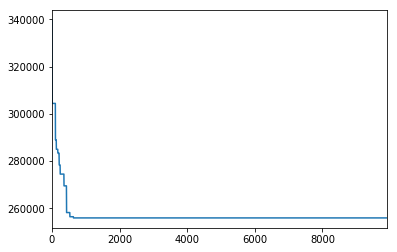

In [14]:
data = Taixxa()
data.loadFile("tai12a.dat")
sol, fit = data.simulatedAnnealing(30, 0.9)
viewer = FitnessViewer(np.array(fit))
viewer.plot()